# Udacity Project Showcase Challenge 2019

### Title of the Project

Deep learning for detection different categories of chest disease by X-Ray images.

## 1- Project Description<p>

<div align="justify">From what I've learned from the Deep learning is that it can be used in several areas, such as: Object Segmentation, Instance segmentation, Object Detection, Image Classification, Image Classification With Localization, Image Style Transfer, Image Colorization, Image Reconstruction, Image Super-Resolution, Image Synthesis, etc. For each area, there are several Neural network model. We can use either existing models or pre-trained models or we can make our own model, well, if we know how it works. But I noticed that when I started using existing models, I quickly arrived at getting for example "RuntimeError: CUDA out of memory. Tried to allocate --.00 MiB (GPU 0; 2.00 GiB total capacity; -.-- GiB already allocated; --.-- MiB free; --.-- MiB cached)". The problem is that during training the model, it is important to have a good PC with a lot of memory or for example use colab,... So, I tried to understand how the models work and see what parameters are using a lot of memory. Then I tried to make a simple model and applied it to detect different categories of chest disease by X-Ray images. 
    
    
    
### Objectif<p>

The objectifs of my project are:
<ul>
                    <li><div align="justify">Try to make models that can work on very modest PCs that include gpu with little memory, because many people have PCs that are not powerful and that also do not have always access to internet and therefore cannot use colab or other.</li>
                    <li><div align="justify">Try to create a model that can unify several fields of application, such as <b>Segmentation, Classification and Object detection</b>.</li>
                    <li> <div align="justify">To try in my spare time to realize an application in the medical field to specialize in the identification and analysis of all common categories of chest disease seen by X-Ray images that can help doctors to detect quickly the diseases. The first two points will be included in this application. </li>
                     <li> <div align="justify">Take into account a secure of the data by using encrypted computation and Differential Privacy.
</ul>
           

###  Progress report<p>

<div align="justify">For the moment I have focused only on the first part, namely making a simple model that uses little memory during learning. I was able to use <b>Dedicated GPU memory 0.5/2.0 Go</b>. So the goal of this code is to design a net model (I named : MyNetModel) that used very small part of the dedicated GPU memory.<p><p>
    
<div align="justify">The next step will be to try to test on :<p><p>
   1- The version 3 of Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images, founded here:<p>  

https://data.mendeley.com/datasets/rscbjbr9sj/3  
    
   2- Then I hope use NIH Chest X-ray Dataset of 14 Common Thorax Disease Categories (1, Atelectasis; 2, Cardiomegaly; 3, Effusion; 4, Infiltration; 5, Mass; 6, Nodule; 7, Pneumonia; 8, Pneumothorax; 9, Consolidation; 10, Edema; 11, Emphysema; 12, Fibrosis; 13, Pleural_Thickening; 14 Hernia), from National Institutes of Health - Clinical Center, founded here:<p>
    
http://academictorrents.com/details/557481faacd824c83fbf57dcf7b6da9383b3235a

<div align="justify">3- Next I will try to improve my model to arrive at 99% of accuracy.<p><p>

<div align="justify">4- After that, I'll try to develop MyNetModel to be able to do <b>Semantic Segmentation, Classification and Object detection</b> at the same time, by always taking into account the minimization of the dedicated GPU memory.<p>
    
<div align="justify">5- At the end I will try to secure the X-Ray images data of the patients by using encrypted computation, and use Differential Privacy for deep learning to update the training of deep learning by using the new X-Ray images data when it is possible depending on the powerfull of the PC. Moreover I will take into account the privacy and the secure of the X-Ray images data when a patient want to access to his data by using encrypted computation. 

## 2- Requirements
    
    - torch, torchvision and torchsummary
    - PIL, matplotlib and seaborn
    - numpy and pandas

## 3- Code

The project code is broken down into multiple steps:
    
    - Data Exploration
    - Load and preprocess the image dataset
    - Train the image classifier on your dataset
    - Use the trained classifier to predict image content


### 3.1- Import modules<p>

<div align="justify">At first we need to Import the following modules :

In [1]:
# --------------------------------------------------------
# import os module
#******************
# https://www.pythonforbeginners.com/os/pythons-os-module
# The functions that the OS module provides allows you to interface with the
# underlying operating system that Python is running on
import os

# PyTorch
#*********
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable

import matplotlib.pyplot as plt
import matplotlib.image as matpltimg

# pip install torchsummary
# https://github.com/sksq96/pytorch-summary
from torchsummary import summary
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader

#import torch.cuda as cuda
#import torch.optim as optim
from torch import cuda, optim
from torch.optim import lr_scheduler

# Image manipulations
#*********************
from PIL import Image

# Data science tools
#********************
import numpy as np
#https://anaconda.org/conda-forge/pandas
import pandas as pd
# https://riptutorial.com/fr/python/example/8598/seaborn
# https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
# https://seaborn.pydata.org/introduction.html
#https://anaconda.org/anaconda/seaborn
import seaborn as sns
# --------------------------------------------------------

### 3.2- PyTorch install Verification<p>

<div align="justify">To check that our PyTorch installation is ready and that we are ready to code, write the following code:

In [2]:
# --------------------------------------------------------
# torch and torchvision version
#-------------------------------
print("Pytorch version : ", torch.__version__)
print("Torchvision version : ", torchvision.__version__)
# --------------------------------------------------------

Pytorch version :  1.2.0
Torchvision version :  0.4.0


### 3.3- Check-up GPU capabilities

In [3]:
# --------------------------------------------------------
# Whether to train on a GPU
#---------------------------
# Device configuration
# and check if CUDA is available
Train_on_GPU = cuda.is_available()

# Assume that we are on a CUDA machine.
# So, we should print a CUDA device:
if not Train_on_GPU:
    print('No, CUDA is not available.')
else:
    print('Yes, CUDA is available.')

print(f'Train on GPU : {Train_on_GPU}')

# Number of gpus
if Train_on_GPU:
    GPU_count = cuda.device_count()
    print(f'Number of GPUs : {GPU_count} GPUs detected.')
    
print("GPU name : ", torch.cuda.get_device_name(device=None))
# --------------------------------------------------------

Yes, CUDA is available.
Train on GPU : True
Number of GPUs : 1 GPUs detected.
GPU name :  GeForce GTX 1050


### 3.4- Data<p>

<div align="justify">To test my network trained model I need to have data. After doing a search I found the following Dataset: <p>
Published: 6 Jan 2018 | Version 2 | DOI: 10.17632/rscbjbr9sj.2 <p>
Contributor(s): Daniel Kermany, Kang Zhang, Michael Goldbaum <p>
Licensed under a Creative Commons Attribution 4.0 International licence. <p>

https://data.mendeley.com/datasets/rscbjbr9sj/2

<div align="justify">I download only the ChestXRay2017.zip dataset. After decompression I obtain two folders (train and test), within each of these two folders I obtain two other folders, namely NORMAL and PNEUMONIA. In the folder PNEUMONIA I obtain images concerning bacteria and virus. Then I put the bacteria images in a folder I named PNEUMONIA_Bacteria and I put the virus images in a folder I named PNEUMONIA_Virus.<p>

I thus get the following folders:

<ul>
	<li><a> Mendeley_Chest_X-Ray_Images </a></li>
	    <ul>
	    <li> chest_xray </li>
	        <ul>
	        <li> train 
                    <ul>
                    <li>NORMAL </li>
                    <li> PNEUMONIA_Bacteria </li>
                    <li> PNEUMONIA_Virus </li>
                    </ul>
            </li>
            <li> test 
                    <ul>
                    <li> NORMAL </li>
                    <li> PNEUMONIA_Bacteria </li>
                    <li> PNEUMONIA_Virus </li>
                    </ul>
            </li>
	        </ul>
</ul>
    
So, the dataset is split into two parts, training and testing. 

In [4]:
# --------------------------------------------------------
# Parameters
#------------
# Location of data
datadir = "H:/12-PersonalLearn/Mendeley_Chest_X-Ray_Images/chest_xray/"
traindir = datadir + "train/"
testdir = datadir + "test/"
# --------------------------------------------------------

### 3.5- Data Exploration

At first I will take a look at the number of images in each category.


In [5]:
# --------------------------------------------------------
# Data Exploration
#------------------
# Empty lists
#*************
categories = []
Numberimages_Totrain = []
Numberimages_Totest = []
image_categories = []
heightShape = []
widthShape = []

# Iterate through each category
#*******************************
for n in os.listdir(traindir):
    categories.append(n)

    # Number of each image
    Train_images = os.listdir(traindir + n)
    Numberimages_Totrain.append(len(Train_images))
    
    Test_images = os.listdir(testdir + n)
    Numberimages_Totest.append(len(Test_images))
    
    # train images
    for index in Train_images:
        image_categories.append(n)
        img = Image.open(traindir + n + '/' + index)
        img_array = np.array(img)

        # Shape
        heightShape.append(img_array.shape[0])
        widthShape.append(img_array.shape[1])

# Dataframe of categories
# http://www.datasciencemadesimple.com/sort-the-dataframe-in-python-pandas-by-index/
# https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/
# https://www.tutorialspoint.com/python_pandas/python_pandas_sorting
Categories_dataframe = pd.DataFrame({
                                     'category': categories
                                    ,'Numberimages_Totrain': Numberimages_Totrain
                                    , 'Numberimages_Totest': Numberimages_Totest
                                    }).sort_values('category')

# Dataframe of training images
image_dataframe = pd.DataFrame({
                                 'Icategory': image_categories
                                ,'height': heightShape
                                ,'width': widthShape
                                })

# A look at the size of the images & the number of images in each train category.
Categories_dataframe.sort_values('Numberimages_Totrain', inplace=False)

# A look at the size of the images & the number of images in each test category.
Categories_dataframe.sort_values('Numberimages_Totest', inplace=False)

Categories_dataframe.head()

,category,Numberimages_Totrain,Numberimages_Totest
0,NORMAL,1349,234
1,PNEUMONIA_Bacteria,2538,242
2,PNEUMONIA_Virus,1345,148


### 3.6- Images Distribution<p>

<div align="justify">The distribution of the images in each category can be plot, as follow :

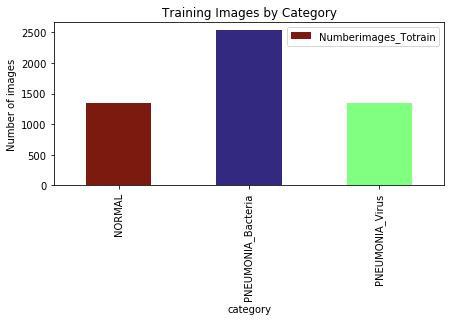

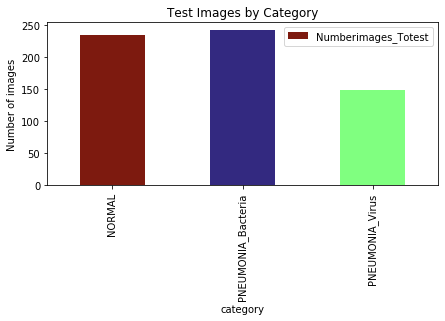

In [6]:
# Images distribution
#*********************
# http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
# make three custom RGBs and repeat/alternate them over all the bar elements.
# https://rgbcolorcode.com/color/violet
# http://www.banquept.fr/documents/2018/MementoPython_BanquePT.pdf
my_colors = [(0.49,0.1,0.06), (0.2, 0.16, 0.5), (0.5, 1, 0.5)]
Categories_dataframe.plot(kind='bar', color=my_colors, x='category', y='Numberimages_Totrain', figsize=(7, 3))
plt.ylabel('Number of images')
plt.title('Training Images by Category')
plt.show()

Categories_dataframe.plot(kind='bar', color=my_colors, x='category', y='Numberimages_Totest', figsize=(7, 3))
plt.ylabel('Number of images')
plt.title('Test Images by Category')
plt.show()

### 3.7- Visualization Images for each classe<p>

<div align="justify">Here is a function for visualization a number of images I have fixed.

In [7]:
# Plot function to visualise class : NORMAL, class : Pneumonia Bacteria and class : PNEUMONIA Virus
def Plot_Images(Directory_path, NumberOfImages = 6):
    
    AllDirectories_path = os.listdir(Directory_path)
    ItemFiles = [os.path.join(Directory_path, file) for file in AllDirectories_path][:NumberOfImages]

    W,H = 9,5
    plt.figure(figsize = ( W,H))
    for index, ImgPath in enumerate(ItemFiles):
        
        Line_Number = 2
        # Because we have NumberOfImages=6 and I choose 2 lines, so, we obtain 3 columns
        Column_Number = NumberOfImages/Line_Number
                
        plt.subplot(Line_Number, Column_Number , index+1)   
        img = matpltimg.imread(ImgPath)
        plt.imshow(img)
        plt.grid(True)
    
    plt.tight_layout()

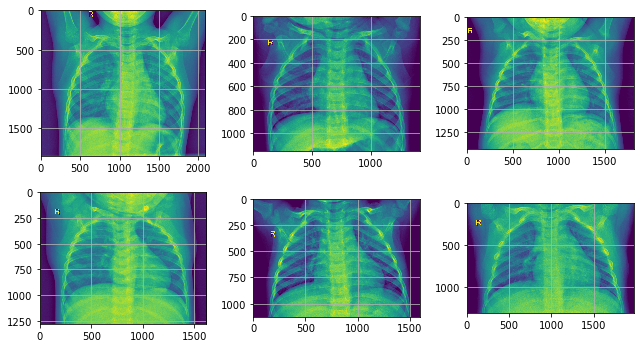

In [8]:
# Visualize training photos, class : Normal
Plot_Images("H:/12-PersonalLearn/Mendeley_Chest_X-Ray_Images/chest_xray/train/NORMAL/")

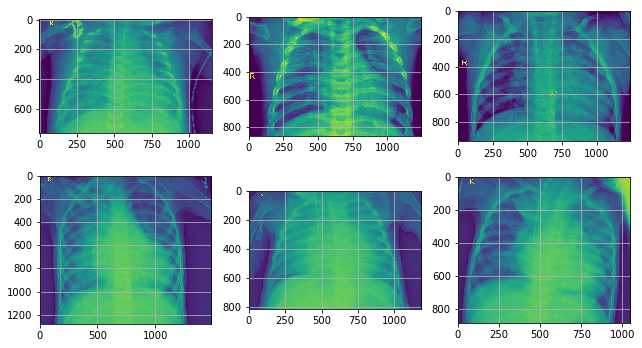

In [9]:
# Visualize training photos, class : Pneumonia Bacteria
Plot_Images("H:/12-PersonalLearn/Mendeley_Chest_X-Ray_Images/chest_xray/train/PNEUMONIA_Bacteria/")

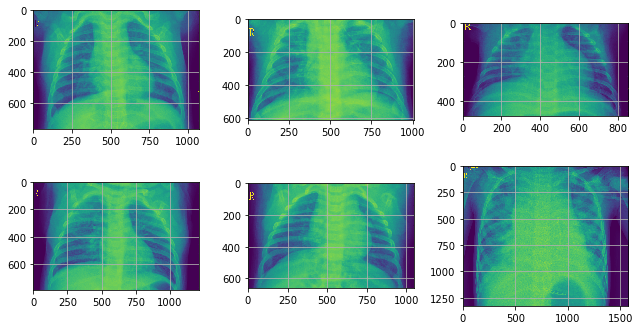

In [10]:
# Visualize training photos, class : PNEUMONIA Virus
Plot_Images("H:/12-PersonalLearn/Mendeley_Chest_X-Ray_Images/chest_xray/train/PNEUMONIA_Virus/")

### 3.8- Image size distribution

In [11]:
# Images Sizes distribution
#***************************
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.describe.html
# image_dataframe for train
images_sizes_stats_by_category = image_dataframe.groupby('Icategory').describe()
images_sizes_stats_by_category.head()

height                                                  \
                     count         mean         std    min     25%     50%   
Icategory                                                                    
NORMAL              1349.0  1380.306894  325.929136  672.0  1152.0  1325.0   
PNEUMONIA_Bacteria  2538.0   802.689913  261.094690  144.0   632.0   760.0   
PNEUMONIA_Virus     1345.0   867.110781  300.117604  127.0   664.0   832.0   

                                      width                                  \
                        75%     max   count         mean         std    min   
Icategory                                                                     
NORMAL              1541.00  2663.0  1349.0  1666.618236  289.155073  912.0   
PNEUMONIA_Bacteria   931.25  2272.0  2538.0  1164.125296  273.401517  399.0   
PNEUMONIA_Virus     1048.00  2304.0  1345.0  1269.189591  310.738297  384.0   

                                                     
                        25%     50%     75%     max  
Icategory                                            
NORMAL              1466.00  1638.0  1820.0  2916.0  
PNEUMONIA_Bacteria   985.25  1128.0  1312.0  2772.0  
PNEUMONIA_Virus     1072.00  1272.0  1448.0  2309.0

Text(0.5, 1.0, 'Average Size Distribution')

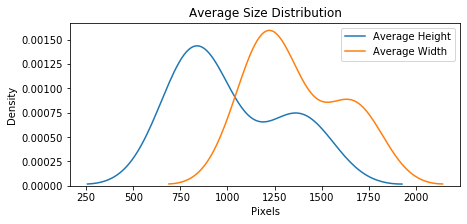

In [12]:
plt.figure(figsize=(7, 3))
sns.kdeplot(images_sizes_stats_by_category['height']['mean'], label='Average Height')
sns.kdeplot(images_sizes_stats_by_category['width']['mean'], label='Average Width')
plt.xlabel('Pixels')
plt.ylabel('Density')
plt.title('Average Size Distribution')
# --------------------------------------------------------

<div align="justify">By looking at the statistics of image size by category of the figure "Average Size Distribution" we can see that the images have different shapes.

### 3.9- Preprocessing<p>

<div align="justify">To properly prepare the images for our network, it is necessary to resize them to 224 x 224 and normalize each color channel by subtracting an average value and dividing by a standard deviation. <i>We will also augment our training data at this stage because there are a limited number of images, we can use image augmentation to artificially increase the number of images "seen" by the network.</i>
    
For the training, I will apply transformations such as random cropping and flipping. This will help the network generalize leading to better performance. I will also need to make sure the input data is resized to 224x224 pixels.

In [13]:
# --------------------------------------------------------
#Image Preprocessing
#-------------------

# Change to fit hardware
batch_size = 16

height, width = 224, 224
resize = (height, width)

Statistics_channel = dict(mean = [0.485, 0.456, 0.406],
                          std  = [0.229, 0.224, 0.225])

# Image transformations
#***********************
image_transforms = {
    
    # Train uses data augmentation
    'train': transforms.Compose([
                                 transforms.RandomResizedCrop(max(resize))
                                 ,transforms.RandomHorizontalFlip()
                                 ,transforms.ToTensor()
                                 ,torchvision.transforms.Normalize(**Statistics_channel)
                        ]),
    # Test does not use augmentation
    'test': transforms.Compose([
                                 transforms.Resize(size=(height,width), interpolation=2)
                                 ,transforms.ToTensor()
                                 ,torchvision.transforms.Normalize(**Statistics_channel)
                        ]),
                    }

# Train Datasets from each folder
Train_DataSet = {'train': datasets.ImageFolder(root=traindir, transform=image_transforms['train'])}

# Train Dataloader iterators
Train_dataloaders = {'train': DataLoader(Train_DataSet['train'], batch_size = batch_size, shuffle = True)}

# Test Datasets from each folder
Test_DataSet = {'test': datasets.ImageFolder(root=traindir, transform=image_transforms['test'])}

# Test Dataloader iterators
Test_dataloaders = {'test': DataLoader(Test_DataSet['test'], batch_size = batch_size, shuffle = True)}

trainiter = iter(Train_dataloaders['train'])

features, labels = next(trainiter)

print("For features.shape we have")
print("torch.Size(batch size, color_channels, height, width) which is equal to : ")
print(features.shape)
print("")
print("For labels.shape we have")
print("torch.Size(batch size) which is equal to : ")
print(labels.shape)
# --------------------------------------------------------

For features.shape we have
torch.Size(batch size, color_channels, height, width) which is equal to : 
torch.Size([16, 3, 224, 224])

For labels.shape we have
torch.Size(batch size) which is equal to : 
torch.Size([16])


In [14]:
num_classes = len(Categories_dataframe)
print(f"There are {num_classes} different categories.")

There are 3 different categories.


In [15]:
train_classes = len(Train_DataSet['train'].classes)
print(f"There are {train_classes} train classes")

There are 3 train classes


In [16]:
test_classes = len(Test_DataSet['test'].classes)
print(f"There are {test_classes} test classes")

There are 3 test classes


In [17]:
print("The classes (train)are : ")
class_names_train = Train_DataSet['train'].classes
print(class_names_train)
print("")
print("and the classes (test)are : ")
class_names_test = Test_DataSet['test'].classes
print(class_names_train)

The classes (train)are : 
['NORMAL', 'PNEUMONIA_Bacteria', 'PNEUMONIA_Virus']

and the classes (test)are : 
['NORMAL', 'PNEUMONIA_Bacteria', 'PNEUMONIA_Virus']


### 3.10- Pneumonia_to_name.json

Inside the Pneumonia_to_name.json file, I put the following information:<p>

{ "NORMAL": "NORMAL", "PNEUMONIA_Bacteria": "PNEUMONIA_Bacteria", "PNEUMONIA_Virus": "PNEUMONIA_Virus"}

because I need to load in a mapping from category label to category name. This will give me a dictionary mapping the integer encoded categories to the actual names to know if a person has a Pneumonia or not .

In [18]:
import json

with open('Pneumonia_to_name.json', 'r') as f:
    Pneumonia_to_name = json.load(f)
    
print(f"Images are labeled with {len(Pneumonia_to_name)} categories, Which are :")
print("")
print(Pneumonia_to_name)

Images are labeled with 3 categories, Which are :

{'NORMAL': 'NORMAL', 'PNEUMONIA_Bacteria': 'PNEUMONIA_Bacteria', 'PNEUMONIA_Virus': 'PNEUMONIA_Virus'}


### 3.11- Defining the Loss Function and Optimizer then Building, training and testing the classifier

Now, I present the last version of my neural network model. I named MyNetModel. 

In [19]:
class MyNetModel(nn.Module):

    def __init__(self, num_classes = 50):
        super(MyNetModel, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
            ,nn.ReLU(inplace=True)
            ,nn.MaxPool2d(kernel_size=3, stride=2)
            ,nn.Conv2d(64, 64, kernel_size=3, padding=1)
            ,nn.Dropout(0.3)
            ,nn.ReLU(inplace=True)
            ,nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(5, 5))
                
        self.classifier = nn.Sequential(
            nn.Dropout(0.3)
            ,nn.Linear(64 * 5 * 5, 256)
            ,nn.BatchNorm1d(256)
            ,nn.ReLU(inplace=True)
            ,nn.Dropout(0.3)
            ,nn.Linear(256, num_classes)
            ,nn.BatchNorm1d(3)
            ,nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [20]:
model = MyNetModel(num_classes)
model

MyNetModel(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Dropout(p=0.3, inplace=False)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(5, 5))
  (classifier): Sequential(
    (0): Dropout(p=0.3, inplace=False)
    (1): Linear(in_features=1600, out_features=256, bias=True)
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Dropout(p=0.3, inplace=False)
    (5): Linear(in_features=256, out_features=3, bias=True)
    (6): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LogSoftmax()
  )
)

In [21]:
# Remark : We freeze all of the existing layers in the network by setting requires_grad to False.
for param in model.parameters():
        param.requires_grad = True

In [22]:
total_parameters = sum(p.numel() for p in model.parameters())
print(f'{total_parameters:,} total parameters.')

total_trainable_parameters = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_parameters:,} training parameters.')

471,369 total parameters.
471,369 training parameters.


In [23]:
# Whether to train on a gpu
if Train_on_GPU:
    model = model.to('cuda')

In [24]:
def get_pretrained_model(model_name):
    
    # model_name (str): name of the model (currently only accepts MyNetModel)
    if model_name == 'MyNetModel':
        model = MyNetModel(num_classes)

        # Don't Freeze all of the existing layers
        for param in model.parameters():
            param.requires_grad = True

    # Move to GPU
    if Train_on_GPU:
        model = model.to('cuda')
    
    # model (PyTorch model): MyNetModel
    return model

In [25]:
model = get_pretrained_model('MyNetModel')
summary(model, input_size = (3, height, width), batch_size = batch_size, device = 'cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [16, 64, 55, 55]          23,296
              ReLU-2           [16, 64, 55, 55]               0
         MaxPool2d-3           [16, 64, 27, 27]               0
            Conv2d-4           [16, 64, 27, 27]          36,928
           Dropout-5           [16, 64, 27, 27]               0
              ReLU-6           [16, 64, 27, 27]               0
         MaxPool2d-7           [16, 64, 13, 13]               0
 AdaptiveAvgPool2d-8             [16, 64, 5, 5]               0
           Dropout-9                 [16, 1600]               0
           Linear-10                  [16, 256]         409,856
      BatchNorm1d-11                  [16, 256]             512
             ReLU-12                  [16, 256]               0
          Dropout-13                  [16, 256]               0
           Linear-14                   

Mapping of Classes to Indexes: To keep track of the predictions made by the model, we must create a mapping of classes to indexes. This will let us know the actual class for a given prediction.

In [26]:
model.class_to_idx = Train_DataSet['train'].class_to_idx
model.idx_to_class = {
                      idx: class_
                      for class_, idx in model.class_to_idx.items()
                     }

list(model.idx_to_class.items())

[(0, 'NORMAL'), (1, 'PNEUMONIA_Bacteria'), (2, 'PNEUMONIA_Virus')]

In [27]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005, betas=[0.9, 0.99], amsgrad=True)

In [28]:
for p in optimizer.param_groups[0]['params']:
    if p.requires_grad:
        print(p.shape)

torch.Size([64, 3, 11, 11])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([256, 1600])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([3, 256])
torch.Size([3])
torch.Size([3])
torch.Size([3])


In [29]:
def train(model, criterion, optimizer, train_loader, test_loader, save_file_name, max_epochs_stop = 3, n_epochs = 20,print_every = 1):
    
    epochs_no_improve = 0
    test_loss_min = np.Inf
    history = []

    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    for epoch in range(n_epochs):

        train_loss, test_loss = 0.0, 0.0 
        train_accuracy, test_accuracy  = 0, 0

        model.train()
        start = timer()

        for ii, (data, target) in enumerate(train_loader):
            if Train_on_GPU:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * data.size(0)
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            train_accuracy += accuracy.item() * data.size(0)
            print(f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.', end='\r')

        else:
            model.epochs += 1
            with torch.no_grad():
                model.eval()
                for data, target in test_loader:
                    if Train_on_GPU:
                        data, target = data.cuda(), target.cuda()

                    output = model(data)
                    loss = criterion(output, target)
                    test_loss += loss.item() * data.size(0)
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    test_accuracy += accuracy.item() * data.size(0)

                train_loss = train_loss / len(train_loader.dataset)
                test_loss = test_loss / len(test_loader.dataset)               
                error_rate = train_loss - test_loss               
                train_accuracy = train_accuracy / len(train_loader.dataset)
                test_accuracy = test_accuracy / len(test_loader.dataset)
                history.append([train_loss, test_loss, train_accuracy, test_accuracy])

                if (epoch + 1) % print_every == 0:
                    print(f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.5f} \tTesting Loss: {test_loss:.5f} \tError between Train & Test losses: {error_rate:.5f}')
                    print(f'\t\tTraining Accuracy: {100 * train_accuracy:.5f}%\t Testing Accuracy: {100 * test_accuracy:.5f}%')

                if test_loss < test_loss_min:
                    torch.save(model.state_dict(), save_file_name)
                    epochs_no_improve = 0
                    test_loss_min = test_loss
                    test_best_accuracy = test_accuracy
                    best_epoch = epoch

                else:
                    epochs_no_improve += 1
                    if epochs_no_improve >= max_epochs_stop:
                        print(f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {test_loss_min:.5f} and accuracy: {100 * test_accuracy:.5f}%')
                        total_time = timer() - overall_start
                        print(f'{total_time:.5f} total seconds elapsed. {total_time / (epoch+1):.5f} seconds per epoch.')
                        model.load_state_dict(torch.load(save_file_name))
                        model.optimizer = optimizer
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'test_loss', 
                                'train_accuracy',  'test_accuracy'
                            ])

                        return model, history

    model.optimizer = optimizer
    
    total_time = timer() - overall_start
    print(f'\nBest epoch: {best_epoch} with loss: {test_loss_min:.5f} and accuracy: {100 * test_accuracy:.5f}%')
    print(f'{total_time:.5f} total seconds elapsed. {total_time / (epoch):.5f} seconds per epoch.')
    
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'test_loss', 'train_accuracy', 'test_accuracy'])
    return model, history

In [30]:
from timeit import default_timer as timer
num_epochs = 100  
max_epochs_stop = 7    
save_file_name = 'MyNetModel-v1-transfer.pt'

model, history = train(model,criterion,optimizer,Train_dataloaders['train'], Test_dataloaders['test'],save_file_name=save_file_name,
                       max_epochs_stop = max_epochs_stop ,n_epochs=num_epochs,print_every=1)

Starting Training from Scratch.

Epoch: 0	100.00% complete. 140.59 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 0.90944 	Testing Loss: 0.80317 	Error between Train & Test losses: 0.10626
		Training Accuracy: 58.46713%	 Testing Accuracy: 64.29664%
Epoch: 1	100.00% complete. 132.63 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.84919 	Testing Loss: 0.79032 	Error between Train & Test losses: 0.05887
		Training Accuracy: 62.06040%	 Testing Accuracy: 63.36009%
Epoch: 2	100.00% complete. 147.59 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 0.81907 	Testing Loss: 0.77867 	Error between Train & Test losses: 0.04040
		Training Accuracy: 62.93960%	 Testing Accuracy: 63.53211%
Epoch: 3	100.00% complete. 141.63 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 0.81354 	Testing Loss: 0.76767 	Error between Train & Test losses: 0.04587
		Training Accuracy: 63.41743%	 Testing Accuracy: 66.55199%
Epoch: 4	100.00% complete. 152.05 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 0.

Epoch: 37	100.00% complete. 122.27 seconds elapsed in epoch.
Epoch: 37 	Training Loss: 0.67907 	Testing Loss: 0.54239 	Error between Train & Test losses: 0.13668
		Training Accuracy: 70.94801%	 Testing Accuracy: 76.60550%
Epoch: 38	100.00% complete. 123.04 seconds elapsed in epoch.
Epoch: 38 	Training Loss: 0.67366 	Testing Loss: 0.60389 	Error between Train & Test losses: 0.06977
		Training Accuracy: 71.02446%	 Testing Accuracy: 72.47706%
Epoch: 39	100.00% complete. 123.73 seconds elapsed in epoch.
Epoch: 39 	Training Loss: 0.66773 	Testing Loss: 0.53933 	Error between Train & Test losses: 0.12839
		Training Accuracy: 70.89067%	 Testing Accuracy: 77.04511%
Epoch: 40	100.00% complete. 122.72 seconds elapsed in epoch.
Epoch: 40 	Training Loss: 0.67413 	Testing Loss: 0.54382 	Error between Train & Test losses: 0.13031
		Training Accuracy: 71.38761%	 Testing Accuracy: 76.26147%
Epoch: 41	100.00% complete. 121.79 seconds elapsed in epoch.
Epoch: 41 	Training Loss: 0.67989 	Testing Loss: 0.

### 3.12- Training Results

We can inspect the training progress by looking at the `history`. 

Text(0.5, 1.0, 'Training and Testing Losses')

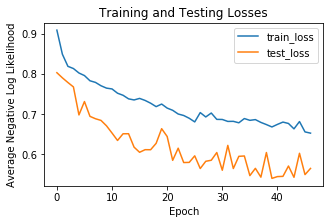

In [31]:
plt.figure(figsize = (5, 3))
for loss in ['train_loss', 'test_loss']:
    plt.plot(
        history[loss], label = loss)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Testing Losses')

Text(0.5, 1.0, 'Training and Testing Accuracy')

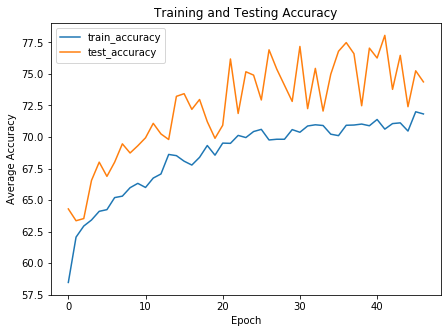

In [32]:
plt.figure(figsize = (7, 5))
for accuracy in ['train_accuracy', 'test_accuracy']:
    plt.plot(100 * history[accuracy], label = accuracy)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Testing Accuracy')

### 3.13- Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

classes = ('NORMAL', 'PNEUMONIA_Bacteria', 'PNEUMONIA_Virus')

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [35]:
def accuracy_per_class(net):
    net = model.to(device)
    
    n_classes = 3
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.int64)

    for images, labels in Test_dataloaders['test']:
        images, labels = images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(batch_size):
            confusion_matrix[labels[i], predicted[i]] += 1
            label = labels[i]

    print("{:<10} {:^10}".format("Class", "Accuracy (%)"))
    for i in range(n_classes):
        class_total = confusion_matrix[i, :].sum()
        class_correct = confusion_matrix[i, i]
        percentage_correct = 100.0 * float(class_correct) / class_total
        
        print('{:<10} {:^10.2f}'.format(classes[i], percentage_correct))
    return confusion_matrix

confusion_matrix = accuracy_per_class(model)

Class      Accuracy (%)
NORMAL       95.03   
PNEUMONIA_Bacteria   90.50   
PNEUMONIA_Virus   33.61   


In [36]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(5, 5), dpi=120)   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=9)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=11, color='red', rotation=45)
    plt.yticks([-0.5, 1, 2.5], classes, fontsize=11, color='blue', rotation=45)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

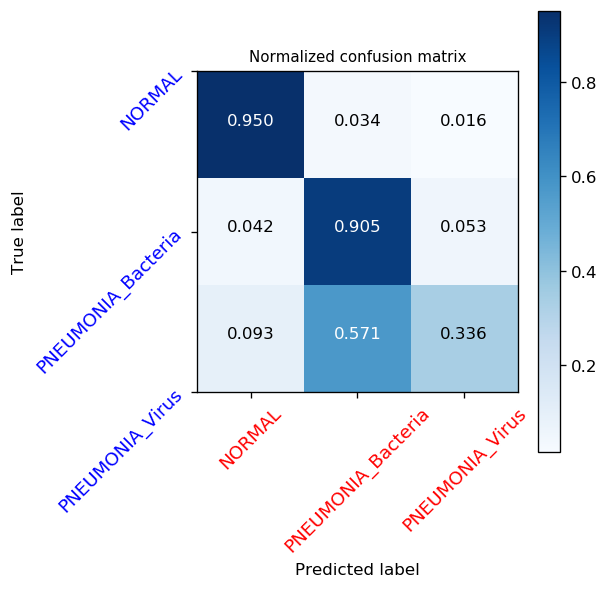

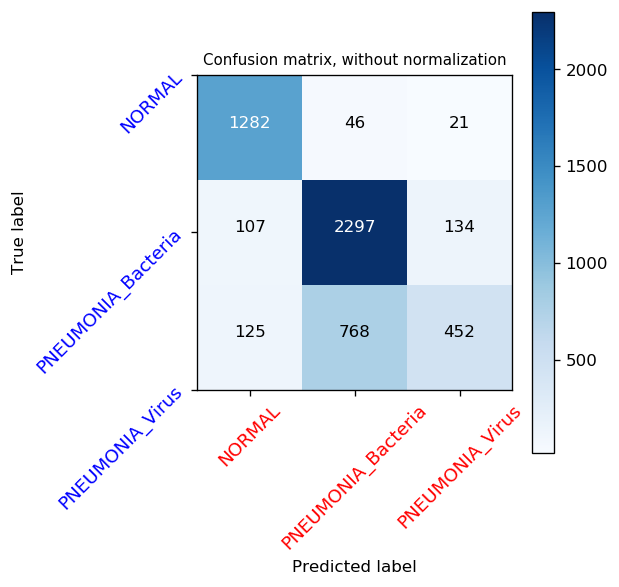

In [37]:
# Plot normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

### 3.14- Saving the checkpoint

Now that our network is trained, I will now save the model so I can load it later for making predictions. 

In [38]:
def save_checkpoint(model, path):

    model_name = path.split('-')[0]
    assert (model_name in 'MyNetModel'), "Path must have the correct model name"

    checkpoint = {'class_to_idx': model.class_to_idx,
                  'idx_to_class': model.idx_to_class,
                  'epochs': model.epochs}

    if model_name == 'MyNetModel':
        checkpoint['classifier'] = model.classifier
        checkpoint['state_dict'] = model.state_dict()

    checkpoint['optimizer'] = model.optimizer
    checkpoint['optimizer_state_dict'] = model.optimizer.state_dict()
    torch.save(checkpoint, path)

In [39]:
checkpoint_path = 'MyNetModel-v1-transfer.pth'
save_checkpoint(model, path=checkpoint_path)

### 3.15- Loading the checkpoint

In [40]:
def load_checkpoint(path):

    model_name = 'MyNetModel'
    checkpoint = torch.load(path)

    if model_name == 'MyNetModel':
        model = MyNetModel()
        for param in model.parameters():
            param.requires_grad = False
        model.classifier = checkpoint['classifier']
        
    model.load_state_dict(checkpoint['state_dict'])
    total_params = sum(p.numel() for p in model.parameters())
    print(f'{total_params:,} total parameters.')
    total_trainable_params = sum(
        p.numel() for p in model.parameters() if p.requires_grad)
    print(f'{total_trainable_params:,} total gradient parameters.')

    if Train_on_GPU:
        model = model.to('cuda')

    model.class_to_idx = checkpoint['class_to_idx']
    model.idx_to_class = checkpoint['idx_to_class']
    model.epochs = checkpoint['epochs']
    optimizer = checkpoint['optimizer']
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    return model, optimizer

In [41]:
model, optimizer = load_checkpoint(path = checkpoint_path)
summary(model, input_size = (3, height, width), batch_size = batch_size)

471,369 total parameters.
411,145 total gradient parameters.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [16, 64, 55, 55]          23,296
              ReLU-2           [16, 64, 55, 55]               0
         MaxPool2d-3           [16, 64, 27, 27]               0
            Conv2d-4           [16, 64, 27, 27]          36,928
           Dropout-5           [16, 64, 27, 27]               0
              ReLU-6           [16, 64, 27, 27]               0
         MaxPool2d-7           [16, 64, 13, 13]               0
 AdaptiveAvgPool2d-8             [16, 64, 5, 5]               0
           Dropout-9                 [16, 1600]               0
           Linear-10                  [16, 256]         409,856
      BatchNorm1d-11                  [16, 256]             512
             ReLU-12                  [16, 256]               0
          Dropout-13                  [16,

In [43]:
model, history = train(model,criterion,optimizer,Train_dataloaders['train'],
                       Test_dataloaders['test'],save_file_name = save_file_name,max_epochs_stop = max_epochs_stop ,n_epochs = num_epochs,print_every = 1)

Model has been trained for: 47 epochs.

Epoch: 0	100.00% complete. 125.36 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 0.66954 	Testing Loss: 0.53830 	Error between Train & Test losses: 0.13123
		Training Accuracy: 71.40673%	 Testing Accuracy: 76.41437%
Epoch: 1	100.00% complete. 150.65 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.66491 	Testing Loss: 0.54851 	Error between Train & Test losses: 0.11640
		Training Accuracy: 71.19648%	 Testing Accuracy: 76.85398%
Epoch: 2	100.00% complete. 155.95 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 0.67169 	Testing Loss: 0.54312 	Error between Train & Test losses: 0.12857
		Training Accuracy: 71.36850%	 Testing Accuracy: 77.31269%
Epoch: 3	100.00% complete. 163.79 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 0.66150 	Testing Loss: 0.53995 	Error between Train & Test losses: 0.12155
		Training Accuracy: 71.50229%	 Testing Accuracy: 77.35092%
Epoch: 4	100.00% complete. 152.70 seconds elapsed in epoch.
Epoch: 4 	Training L

### 3.16- Inference for classification

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the resize methods. Then you'll need to crop out the center 224x224 portion of the image.

In [44]:
def process_image(image_path):

    image = Image.open(image_path)
    img = image.resize((256, 256))

    width = 256
    height = 256
    new_width = 224
    new_height = 224

    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    img = img.crop((left, top, right, bottom))
    img = np.array(img)/ 256

    means = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    stds = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))

    img = img - means
    img = img / stds

    img_tensor = torch.Tensor(img)

    return img_tensor

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your process_image function works, running the output through this function should return the original image (except for the cropped out portions).

In [45]:
def imshow_tensor(image, ax=None, title=None):
    """Imshow for Tensor."""

    if ax is None:
        fig, ax = plt.subplots()

    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    image = np.clip(image, 0, 1)

    ax.imshow(image)
    plt.axis('off')

    return ax, image

In [46]:
image_path = testdir + "/PNEUMONIA_Virus/person1_virus_6.jpeg"
x = process_image(image_path)
x.shape

torch.Size([3, 224, 224])

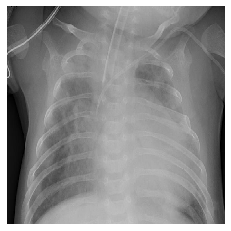

In [47]:
ax, image = imshow_tensor(x)

### 3.17- Prediction function

Once I can get images in the correct format, it's time to write a function for making predictions with my model. 

In [48]:
def predict(image_path, model, topk=3):

    real_class = image_path.split('/')[-2]
    img_tensor = process_image(image_path)
    if Train_on_GPU:
        img_tensor = img_tensor.view(1, 3, 224, 224).cuda()

    with torch.no_grad():
        model.eval()
        out = model(img_tensor)
        ps = torch.exp(out)
        topk, topclass = ps.topk(topk, dim=1)
        top_classes = [model.idx_to_class[class_] for class_ in topclass.cpu().numpy()[0]]
        top_p = topk.cpu().numpy()[0]

        return img_tensor.cpu().squeeze(), top_p, top_classes, real_class

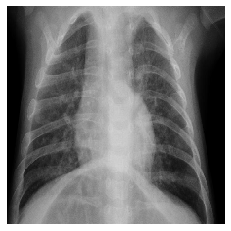

In [49]:
def random_test_image():
    """Pick a random test image from the test directory"""
    c = np.random.choice(Categories_dataframe['category'])
    root = testdir + c + '/'
    img_path = root + np.random.choice(os.listdir(root))
    return img_path

_ = imshow_tensor(process_image(random_test_image()))

In [50]:
img, top_p, top_classes, real_class = predict(random_test_image(), model)
img.shape

torch.Size([3, 224, 224])

In [51]:
top_p, top_classes, real_class

(array([0.5965023 , 0.20477721, 0.19872041], dtype=float32),
 ['PNEUMONIA_Bacteria', 'NORMAL', 'PNEUMONIA_Virus'],
 'PNEUMONIA_Bacteria')

In [52]:
img, top_p, top_classes, real_class = predict(random_test_image(), model)
top_p, top_classes, real_class

(array([0.9382874 , 0.05294443, 0.0087682 ], dtype=float32),
 ['PNEUMONIA_Bacteria', 'PNEUMONIA_Virus', 'NORMAL'],
 'PNEUMONIA_Bacteria')

### 3.18- Checking

In [53]:
def display_prediction(image_path, model, topk):

    img, ps, classes, y_obs = predict(image_path, model, topk)
    result = pd.DataFrame({'p': ps}, index=classes)
    plt.figure(figsize=(16, 5))
    ax = plt.subplot(1, 2, 1)
    ax, img = imshow_tensor(img, ax=ax)
    ax.set_title(y_obs, size=20)
    ax = plt.subplot(1, 2, 2)
    result.sort_values('p')['p'].plot.barh(color='blue', edgecolor='k', ax=ax)
    plt.xlabel('Predicted Probability')
    plt.tight_layout()

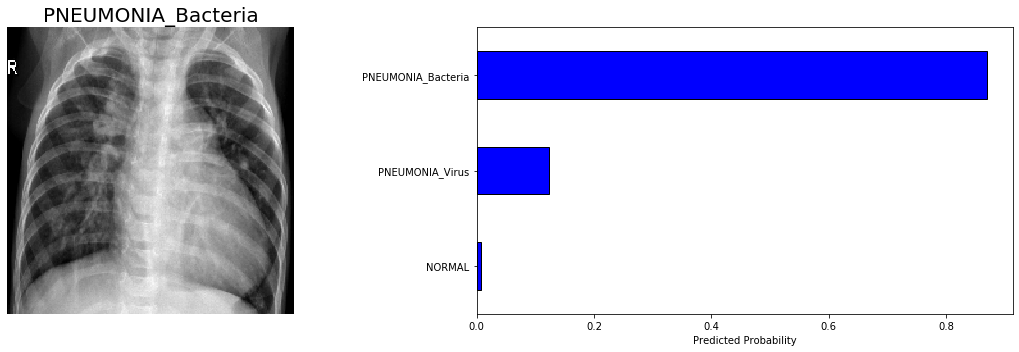

In [54]:
display_prediction(random_test_image(), model, topk=3)

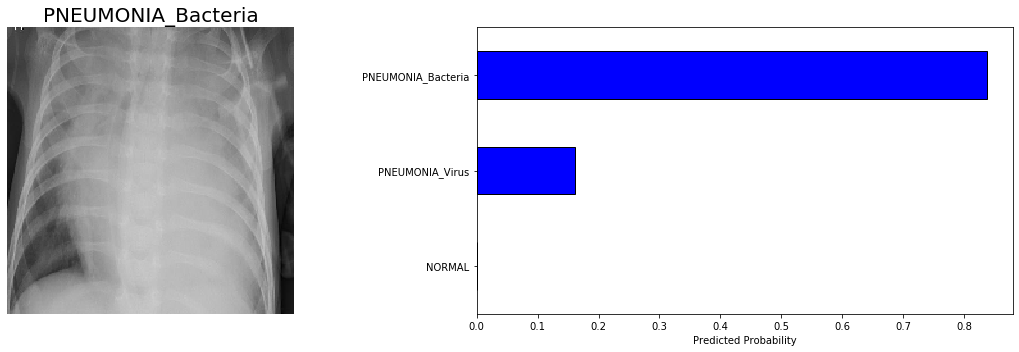

In [55]:
display_prediction(random_test_image(), model, topk=3)

### 3.19- Testing Accuracy

In [56]:
def accuracy(output, target, topk=(1, 3)):
    if Train_on_GPU:
        output = output.to('cuda')
        target = target.to('cuda')

    with torch.no_grad():
        maxk = 3
        batch_size = target.size(0)
        _, pred = output.topk(k=maxk, dim=1, largest=True, sorted=True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))
        res = []

        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size).item())
        return res

In [57]:
testiter = iter(Test_dataloaders['test'])
features, targets = next(testiter)

if Train_on_GPU:
    accuracy(model(features.to('cuda')), targets, topk=(1, 3))

### 3.20- Performance calculation for each category.

In [58]:
def evaluate(model, test_loader, criterion, topk=(1,2,3)):

    classes = []
    losses = []
    acc_results = np.zeros((len(test_loader.dataset), len(topk)))
    i = 0

    model.eval()
    with torch.no_grad():
        for data, targets in test_loader:
            if Train_on_GPU:
                data, targets = data.to('cuda'), targets.to('cuda')

            out = model(data)
            for pred, true in zip(out, targets):
                acc_results[i, :] = accuracy(
                    pred.unsqueeze(0), true.unsqueeze(0), topk)
                classes.append(model.idx_to_class[true.item()])
                loss = criterion(pred.view(1, num_classes), true.view(1))
                losses.append(loss.item())
                i += 1

    results = pd.DataFrame(acc_results, columns=[f'top{i}' for i in topk])
    results['class'] = classes
    results['loss'] = losses
    results = results.groupby(classes).mean()

    return results.reset_index().rename(columns={'index': 'class'})

In [59]:
criterion = nn.NLLLoss()
results = evaluate(model, Test_dataloaders['test'], criterion)
results.head()

,class,top1,top2,top3,loss
0,NORMAL,94.885100,96.738325,100.0,0.262325
1,PNEUMONIA_Bacteria,91.922774,99.211978,100.0,0.359109
2,PNEUMONIA_Virus,34.200743,91.821561,100.0,1.132775


(20, 100)

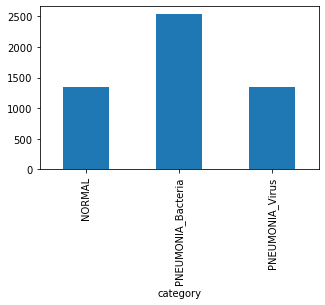

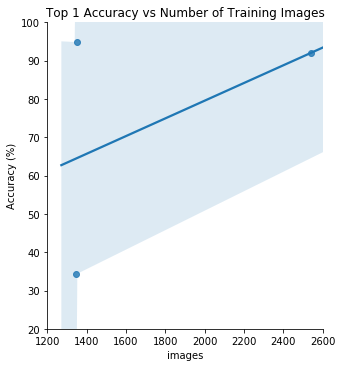

In [60]:
results = results.merge(Categories_dataframe, left_on='class', right_on='category').\
    drop(columns=['category'])

Categories_dataframe.set_index('category')['Numberimages_Totrain'].plot.bar(figsize=(5, 3))

sns.lmplot(
    y='top1', x='Numberimages_Totrain', data=results, height=5)
plt.xlabel('images')
plt.ylabel('Accuracy (%)')
plt.title('Top 1 Accuracy vs Number of Training Images')
plt.xlim(1200, 2600)
plt.ylim(20, 100)

In [61]:
print('Category with minimum accuracy.')
results.loc[results['top1'].idxmin]

print('Category with minimum images.')
results.loc[results['Numberimages_Totrain'].idxmin]

Category with minimum accuracy.
Category with minimum images.


class                   PNEUMONIA_Virus
top1                            34.2007
top2                            91.8216
top3                                100
loss                            1.13278
Numberimages_Totrain               1345
Numberimages_Totest                 148
Name: 2, dtype: object